# Assignment 2


#### 1. 复习上课内容以及复现课程代码

在本部分，你需要在复习上课内容和课程代码后，复现课程代码。 

#### 2. 回答以下理论题目

###       < 评阅点 >： 答案是否正确完整

###### 2.1 What conditions are required to make the BFS return the optimal solution ?

Ans:

    The edges of the graph have the same weights, and we want a minimum numbers of edges connected from the start node to the destination.

##### 2.2 Is there a way to make DFS find the optimal solution ? (You may need to read some material about iterative DFS)

Ans: 
    
    From the perspective of IDDFS, the depth(maybe we can say the distance between the initial node and the ended node in the graph) of the search tree can be set from 0 to MAX_DEPTH. Then iterativele run the DLS code with the depth(distance) limitation of tree.

##### 2.3 In what conditions BFS is a better choice than DFS and vice versa ?

Conditions(BFS is better):
1. The path cost is different, and we're in wanting of the least cost. 
2. The graph or the tree is small, that's to say, the goal is near the start.
3. Not need to consider the space consuming.

Conditions(DFS is better):
1. Just be wanting of a result.
2. The graph or the tree is large, that's to say, the goal is far away from the start.
3. Making decisions quickly.

##### 2.4 When can we use machine learning ?

Ans:
    1. When the principle of the data is difficult to find by people, we can use machine to help;
    2. When the data is vast, people can hardly tackle with it directly;
    3. When it's too demanding to model the data.

##### 2.5 What is the gradient of a function ?

Ans:

    1. The slope of a function.
    2. A specific type of multivariable derivative. 
    3. When there are multiple inputs of a function, all the derivatives can be store as a matrix and the matrix then can be called gradient. 

##### 2.6 How can we find the maximum value of a function using the information of gradient ?

Ans:

    1. Firstly, we can compute the gradient of the function by calculating the first derivatives, and then obtain the point where the the first derivatives y=0;
    2. Secondly, in order to assure that the point is a maximum or minimum, we should find the the second derivative where y=0;
    3. Finally, if the second derivative is positive, the point is a minimum, otherwise a maxmimum.

#### 3. 实践部分  寻找地铁路线

### < 评阅点 >  1: 爬虫爬取数据是否完整;  2:搜索算法是否正确

In this part, although we recommend you to use Beijing subway, you still can use the subway map of any cities that you are interested in. 

![title](img/ditu.png)

Please using the search policy to implement an agent. This agent receives two input, one is @param start station and the other is @param destination. Your agent should give the optimal route based on Beijing Subway system.

Deadline: 2019-May

#### Procedures

#### 1. Get data from web.  

Some tips: 

a. You might need this package: requests[https://2.python-requests.org/en/master/] to get webpages

b.You might need to use Regular Expression and Beautiful Soap package to parse the webpages

In [40]:
import requests
from bs4 import BeautifulSoup as sp
import re
import os
from collections import defaultdict
import json

In [93]:
lines = ['1','2','3','4','5','6','7','8','9','10','11','12','13','14','14haoxiandong','15','16']
all_stations_in_one_lines = defaultdict(list)
def dataFromWebs(lines):
    station_dict = defaultdict(set)
    # 把北京地铁1-16号线都拿过来
    for l in lines:
        # 爬虫操作
        url = "https://ditie.mapbar.com/beijing/line_ditie" + str(l) + "haoxian/"
        html = requests.get(url).text
        soup = sp(html,"html.parser")
        allTags = soup.find_all("a",string=re.compile("(站)$"))
        all_stations_in_one_lines[l] = [tag.get_text()[:-1] for tag in allTags]
        # 把除了自己的站点都加进去
        for i, station in enumerate(allTags):
            station_name = station.get_text()[:-1]
            # 在一条线路中，除了最后一个结点，其它结点都有next结点
            if i < len(allTags) - 1: next_station = allTags[i+1].get_text()[:-1]
            # 在一条线路中，除了第一个结点，其它结点都有previous结点
            if i > 0: pre_station = allTags[i-1].get_text()[:-1]
            # 除了第一个结点，最后一个结点，其他节点都有前驱后继结点
            if i == 0: station_dict[station_name].add(next_station)
            elif i == len(allTags)-1: station_dict[station_name].add(pre_station)
            else: 
                station_dict[station_name].add(next_station)
                station_dict[station_name].add(pre_station)
    return station_dict
station_dict = dataFromWebs(lines)
print(station_dict.keys())

dict_keys(['苹果园', '古城', '八角游乐园', '八宝山', '玉泉路', '五棵松', '万寿路', '公主坟', '军事博物馆', '木樨地', '南礼士路', '复兴门', '西单', '天安门西', '天安门东', '王府井', '东单', '建国门', '永安里', '国贸', '大望路', '四惠', '四惠东', '积水潭', '鼓楼大街', '安定门', '雍和宫', '东直门', '东四十条', '朝阳门', '北京', '崇文门', '前门', '和平门', '宣武门', '长椿街', '阜成门', '车公庄', '西直门', '曹各庄北', '高辛庄', '楼梓庄', '楼梓庄桥西', '管庄路口西', '东风', '东坝中街', '平房村', '朝阳体育中心', '星火', '石佛营', '朝阳公园', '团结湖', '工人体育场', '天通苑北', '天通苑', '天通苑南', '立水桥', '立水桥南', '北苑路北', '大屯路东', '惠新西街北口', '惠新西街南口', '和平西桥', '和平里北街', '北新桥', '张自忠路', '东四', '灯市口', '磁器口', '天坛东门', '蒲黄榆', '刘家窑', '宋家庄', '海淀五路居', '慈寿寺', '花园桥', '白石桥南', '车公庄西', '平安里', '北海北', '南锣鼓巷', '东大桥', '呼家楼', '金台路', '十里堡', '青年路', '褡裢坡', '黄渠', '常营', '草房', '物资学院路', '通州北关', '北运河西', '郝家府', '东夏园', '潞城', '北京西', '湾子', '达官营', '广安门内', '菜市口', '虎坊桥', '珠市口', '桥湾', '广渠门内', '广渠门外', '九龙山', '大郊亭', '百子湾', '化工', '南楼梓庄', '欢乐谷景区', '双合', '焦化厂', '什刹海', '安德里北街', '安华桥', '北土城', '奥体中心', '奥林匹克公园', '森林公园南门', '林萃桥', '永泰庄', '西小口', '育新', '霍营', '回龙观东大街', '平西府', '育知路', '朱辛庄', '郭公庄', '丰台科技园', '科怡路', '丰台南路', '丰台东

In [127]:
print(station_dict['奥体中心'])# 假设 该站点 只能去往自己的 下一个 或 前一个 站点

['奥林匹克公园', '北土城']


In [95]:
print(station_dict['鼓楼大街'])

{'积水潭', '安定门', '什刹海', '安德里北街'}


In [96]:
print(station_dict['复兴门'])

{'长椿街', '阜成门', '西单', '南礼士路'}


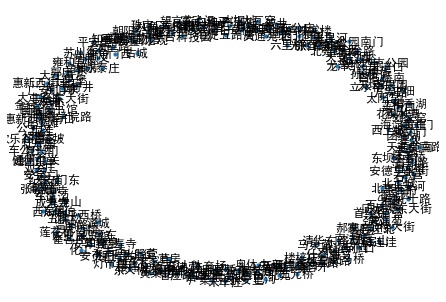

In [97]:
import networkx as nx
import matplotlib.pyplot as plt
#%matplotlib inline
subway_graph = nx.Graph()

subway_graph.add_nodes_from(list(station_dict.keys()))

nx.draw(subway_graph, with_labels=True, node_size=10)

In [98]:
def build_connection(subway_info):
    for k,v in subway_info.items():
        subway_info[k] = list(v)
    return subway_info
stations_connection = build_connection(station_dict)
print(stations_connection)

defaultdict(<class 'set'>, {'苹果园': ['古城'], '古城': ['八角游乐园', '苹果园'], '八角游乐园': ['八宝山', '古城'], '八宝山': ['八角游乐园', '玉泉路'], '玉泉路': ['八宝山', '五棵松'], '五棵松': ['玉泉路', '万寿路'], '万寿路': ['公主坟', '五棵松'], '公主坟': ['西钓鱼台', '莲花桥', '万寿路', '军事博物馆'], '军事博物馆': ['北京西', '公主坟', '白堆子', '木樨地'], '木樨地': ['军事博物馆', '南礼士路'], '南礼士路': ['复兴门', '木樨地'], '复兴门': ['长椿街', '阜成门', '西单', '南礼士路'], '西单': ['复兴门', '天安门西'], '天安门西': ['天安门东', '西单'], '天安门东': ['天安门西', '王府井'], '王府井': ['天安门东', '东单'], '东单': ['建国门', '崇文门', '灯市口', '王府井'], '建国门': ['东单', '永安里', '北京', '朝阳门'], '永安里': ['建国门', '国贸'], '国贸': ['金台夕照', '双井', '永安里', '大望路'], '大望路': ['国贸', '四惠'], '四惠': ['四惠东', '大望路'], '四惠东': ['四惠'], '积水潭': ['西直门', '鼓楼大街'], '鼓楼大街': ['积水潭', '安定门', '什刹海', '安德里北街'], '安定门': ['雍和宫', '鼓楼大街'], '雍和宫': ['北新桥', '安定门', '东直门', '和平里北街'], '东直门': ['雍和宫', '东四十条', '柳芳'], '东四十条': ['东直门', '工人体育场', '朝阳门'], '朝阳门': ['东大桥', '建国门', '东四', '东四十条'], '北京': ['建国门', '崇文门'], '崇文门': ['磁器口', '东单', '北京', '前门'], '前门': ['和平门', '崇文门'], '和平门': ['宣武门', '前门'], '宣武门': ['和平门', '长椿街'], '长椿街': ['复兴门', '宣

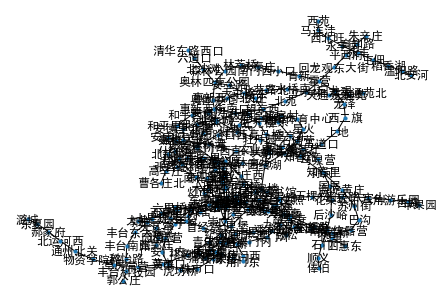

In [99]:
stations_connection_graph = nx.Graph(stations_connection)

nx.draw(stations_connection_graph,with_labels=True,node_size=10)

##### 2. Preprocessing data

Some tips:

a. Find a suitable way to save the data you get from the web. (Note: The way you use to save the data should be able to be used to create the graph that your agent is going to explore)

In [100]:
# 按照字典存储，存储格式为txt
index = 1
with open('./station_dict.txt', 'w') as f:
    for k,v in station_dict.items(): 
        f.write(str(index) + '. ' + str(k) + ': ')
        for s in v:
            f.write(str(s) + ' ')
        f.write('\n')
        index += 1

#### 3. Build the search agent

Build the search agent based ont he graph you built.

for example, if you use Beijing subway graoh, and you run:

\>>> search("奥体中心“，”天安门“）

You should get the result as follows: 奥体中心 -> A ->B ->C ... -> 天安门

In [101]:
def search_bfs_1(graph, start, destinaiton):
    pathes = [[start]]
    visited = set()
    
    while pathes:
        path = pathes.pop(0)
        the_last_station_in_path = path[-1]
        
        if the_last_station_in_path in visited: continue
            
        stations_waiting_for_searching = graph[the_last_station_in_path]
        for station in stations_waiting_for_searching:
            if station in path: continue
            new_path = path + [station]
            pathes.append(new_path)
            if station == destinaiton:
                return new_path
        visited.add(the_last_station_in_path)

In [128]:
# Search by BFS without limitation
import time
start_time = time.time()
print(search_bfs_1(stations_connection, start='奥体中心', destinaiton='天安门西'))
print(search_bfs_1(stations_connection, start='奥体中心', destinaiton='天安门东'))
print('------------- Time Consuming -------------: {}'.format(time.time()-start_time))

['奥体中心', '北土城', '安华桥', '安德里北街', '鼓楼大街', '积水潭', '西直门', '车公庄', '阜成门', '复兴门', '西单', '天安门西']
['奥体中心', '北土城', '安华桥', '安德里北街', '鼓楼大街', '什刹海', '南锣鼓巷', '东四', '灯市口', '东单', '王府井', '天安门东']
------------- Time Consuming -------------: 0.0012242794036865234


In [84]:
def search_dfs_1(graph, start, destinaiton):
    pathes = [[start]]
    visited = set()
    
    while pathes:
        path = pathes.pop(0)
        the_last_station_in_path = path[-1]
        
        if the_last_station_in_path in visited: continue
            
        stations_waiting_for_searching = graph[the_last_station_in_path]
        for station in stations_waiting_for_searching:
            if station in path: continue
            new_path = path + [station]
            pathes = [new_path] + pathes
            if station == destinaiton:
                return new_path
        visited.add(the_last_station_in_path)

In [129]:
# Search by DFS
start_time = time.time()
print(search_dfs_1(stations_connection, start='奥体中心', destinaiton='天安门西'))
print(search_dfs_1(stations_connection, start='奥体中心', destinaiton='天安门东'))
print('------------- Time Consuming -------------: {}'.format(time.time()-start_time))

['奥体中心', '北土城', '健德门', '牡丹园', '西土城', '知春路', '五道口', '上地', '西二旗', '龙泽', '回龙观', '霍营', '立水桥', '立水桥南', '北苑路北', '大屯路东', '惠新西街北口', '惠新西街南口', '和平西桥', '和平里北街', '雍和宫', '东直门', '柳芳', '光熙门', '芍药居', '太阳宫', '三元桥', '亮马桥', '农业展览馆', '团结湖', '呼家楼', '金台夕照', '国贸', '永安里', '建国门', '朝阳门', '东四', '南锣鼓巷', '北海北', '平安里', '车公庄', '阜成门', '复兴门', '南礼士路', '木樨地', '军事博物馆', '白堆子', '白石桥南', '花园桥', '慈寿寺', '西钓鱼台', '公主坟', '莲花桥', '六里桥', '六里桥东', '北京西', '湾子', '达官营', '广安门内', '菜市口', '虎坊桥', '珠市口', '桥湾', '磁器口', '崇文门', '东单', '王府井', '天安门东', '天安门西']
['奥体中心', '北土城', '健德门', '牡丹园', '西土城', '知春路', '五道口', '上地', '西二旗', '龙泽', '回龙观', '霍营', '立水桥', '立水桥南', '北苑路北', '大屯路东', '惠新西街北口', '惠新西街南口', '和平西桥', '和平里北街', '雍和宫', '东直门', '柳芳', '光熙门', '芍药居', '太阳宫', '三元桥', '亮马桥', '农业展览馆', '团结湖', '呼家楼', '金台夕照', '国贸', '永安里', '建国门', '朝阳门', '东四', '南锣鼓巷', '北海北', '平安里', '车公庄', '阜成门', '复兴门', '南礼士路', '木樨地', '军事博物馆', '白堆子', '白石桥南', '花园桥', '慈寿寺', '西钓鱼台', '公主坟', '莲花桥', '六里桥', '六里桥东', '北京西', '湾子', '达官营', '广安门内', '菜市口', '虎坊桥', '珠市口', '桥湾', '磁器口', '崇文门', '东单', '王府井', '天安门东']
------

### (Optional) Improve your agent to make it able to find a path based on different strategies

###  <评阅点> : 是否正确得到不同目标下的路径。

Some ideas you might want to try:

a. Find the shortest path between two stations.

Ans：
    1. **search_bfs_1** has achived this goal because we assume that the distance between two stations is the same. 

b. Find the path that requires minimum transfers between two stations.

c. Combine the previous two ideas, find a more suitable path.

In [130]:
all_stations_in_one_lines # 用于记录 每条线路 有哪些站点

defaultdict(list,
            {'1': ['苹果园',
              '古城',
              '八角游乐园',
              '八宝山',
              '玉泉路',
              '五棵松',
              '万寿路',
              '公主坟',
              '军事博物馆',
              '木樨地',
              '南礼士路',
              '复兴门',
              '西单',
              '天安门西',
              '天安门东',
              '王府井',
              '东单',
              '建国门',
              '永安里',
              '国贸',
              '大望路',
              '四惠',
              '四惠东'],
             '2': ['积水潭',
              '鼓楼大街',
              '安定门',
              '雍和宫',
              '东直门',
              '东四十条',
              '朝阳门',
              '建国门',
              '北京',
              '崇文门',
              '前门',
              '和平门',
              '宣武门',
              '长椿街',
              '复兴门',
              '阜成门',
              '车公庄',
              '西直门',
              '积水潭'],
             '3': ['曹各庄北',
              '高辛庄',
              '楼梓庄',
              '楼梓

In [110]:
def search_bfs_2(graph, start, destination, search_strategy):
    pathes = [[start]]
    visited = set()
    
    while pathes:
        path = pathes.pop(0)
        the_last_station_in_path = path[-1]
        
        if the_last_station_in_path in visited: continue
        if the_last_station_in_path == destination: return path
            
        stations_waiting_for_searching = graph[the_last_station_in_path]
        for station in stations_waiting_for_searching:
            if station in path: continue
            new_path = path + [station]
            pathes.append(new_path)
        pathes = search_strategy(pathes)
        
        visited.add(the_last_station_in_path)

In [131]:
def sort_by_huancheng(pathes):
    def get_huancheng_times(path): # 得到 众多pathes中的其中一个path，内部换乘的次数 
        times = 0
        for i,_ in enumerate(path[:-1]):
            times += get_if_huancheng(path[i],path[i+1]) # if 有换乘站点: time += 1 else: time += 0
        return times
    return sorted(pathes,key=get_huancheng_times) # 将 path 排序后返回

def get_if_huancheng(station1, station2):
    station1_line, station2_line = None, None # 记录 前一个站点和后一个站点 所处的 线路
    for k,v in all_stations_in_one_lines.items():
        if station1 in v: # 如果 station1 在 x 线路中
            station1_line = k
            if station2 in v: station2_line = k # 判断 station2 是否和它 一个线路
            break 
    return 1 if station1_line != station2_line else 0 # 如果 station1 与 station2 在同一个线路中， 则无需换乘，反之同理

In [133]:
start_time = time.time()
print(search_bfs_2(stations_connection, start='奥体中心', destination='天安门西', search_strategy=sort_by_huancheng))
print(search_bfs_2(stations_connection, start='西二旗', destination='霍营', search_strategy=sort_by_huancheng))
print('------------- Time Consuming -------------: {}'.format(time.time()-start_time))

['奥体中心', '北土城', '安华桥', '安德里北街', '鼓楼大街', '积水潭', '西直门', '车公庄', '阜成门', '复兴门', '西单', '天安门西']
['西二旗', '龙泽', '回龙观', '霍营']
------------- Time Consuming -------------: 0.006488323211669922


Compare your results with results obtained by using some apps such as Baidu map, A map, Google map or Apple map. If there is difference, try to explanate it.

Ans1:

    1. The route of '奥体中心' --> '天安门西' is the same with '高德地图' app.
Ans2:
    
    1. They will consider the time consuming(distance) between the start and destination;
    2. They may consider the price;
    3. They may consider how crowded the stations are.

## Congratulations ! You have finished the assignment of week 2.

![title](img/agent.png)

### If you have any suggestions regarding the teaching, please feel free to send them to my eamil (eric.lee.xiao@gmail.com) 